<a href="https://colab.research.google.com/github/manasdeshpande/DAV_Lab/blob/main/exp2/exp2_DAV_D11AD_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.kaggle.com/datasets/ishaanthareja007/company-sales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/company.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
df.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [3]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

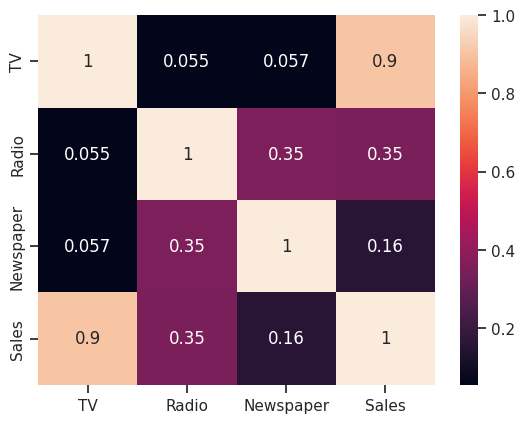

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show()

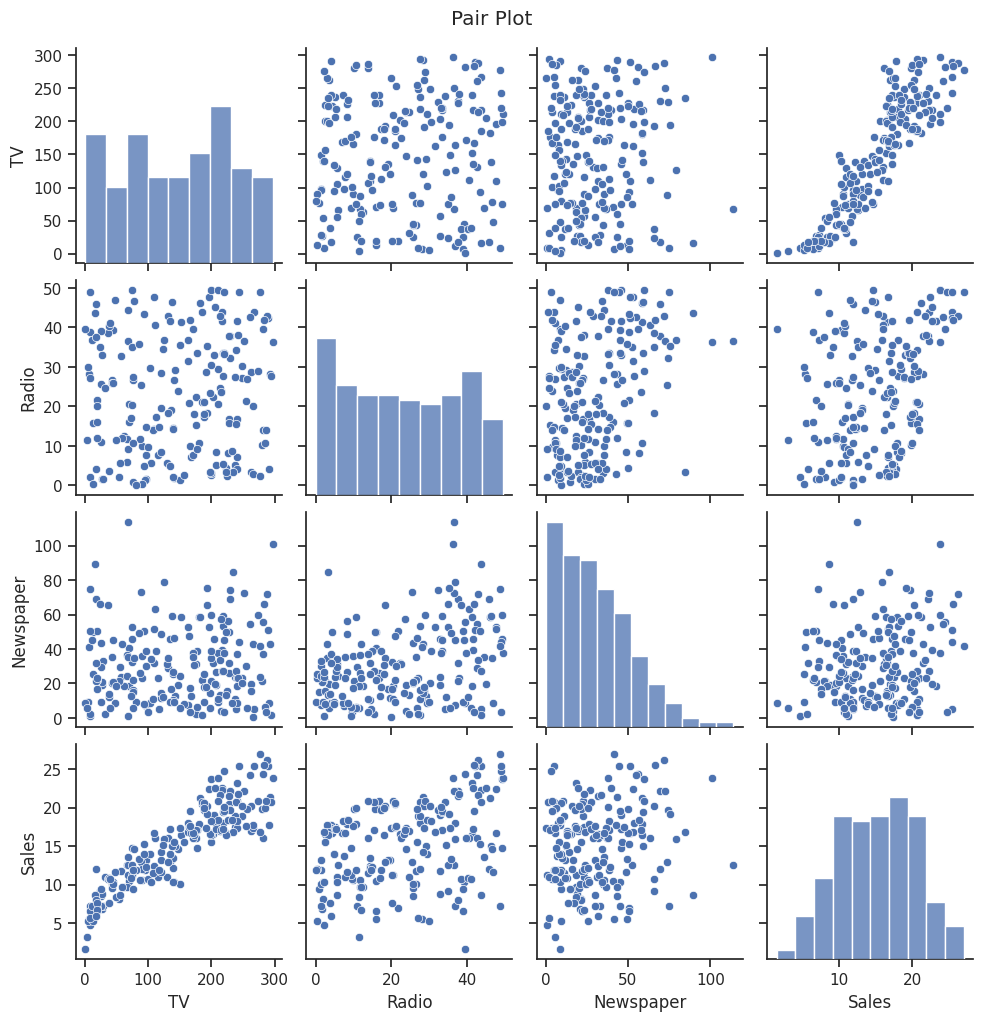

In [6]:

sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(df)
plt.suptitle('Pair Plot',y=1.02)
plt.show()

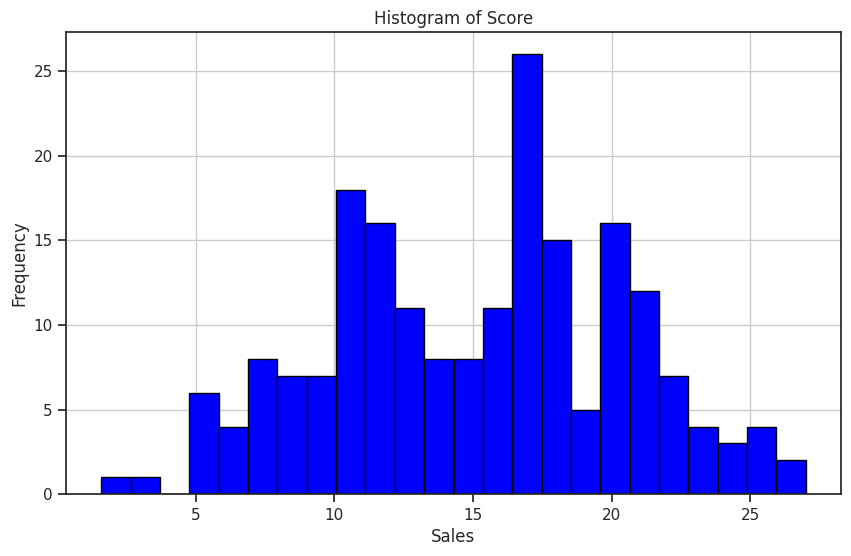

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=24, color='blue', edgecolor='black')
plt.title('Histogram of Score')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
x = df["TV"].values.reshape(-1,1)
y = df["Sales"].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


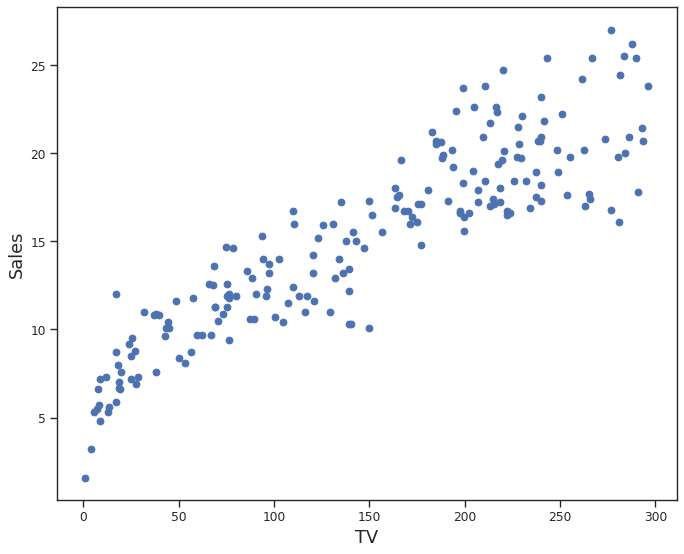

In [14]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(x,y)
plt.xlabel("TV",size = 16)
plt.ylabel("Sales",size = 16)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [21]:
y_predict = reg.predict(x_test)
y_predict.shape

(50, 1)

In [23]:
import numpy as np
x_test = np.reshape(x_test,(x_test.shape[0]))
y_test = np.reshape(y_test,(y_test.shape[0]))
y_predict = np.reshape(y_predict,(y_predict.shape[0]))
df1 = pd.DataFrame({"X":x_test,"Actual":y_test,"Predict":y_predict})
df1

,X,Actual,Predict
0,163.3,16.9,16.143474
1,195.4,22.4,17.921382
2,292.9,21.4,23.321569
3,11.7,7.3,7.746876
4,220.3,24.7,19.300506
5,75.1,12.6,11.258382
6,216.8,22.3,19.106654
7,50.0,8.4,9.868180
8,222.4,16.5,19.416818
9,175.1,16.1,16.797035


In [25]:
y_plot = reg.predict(x)

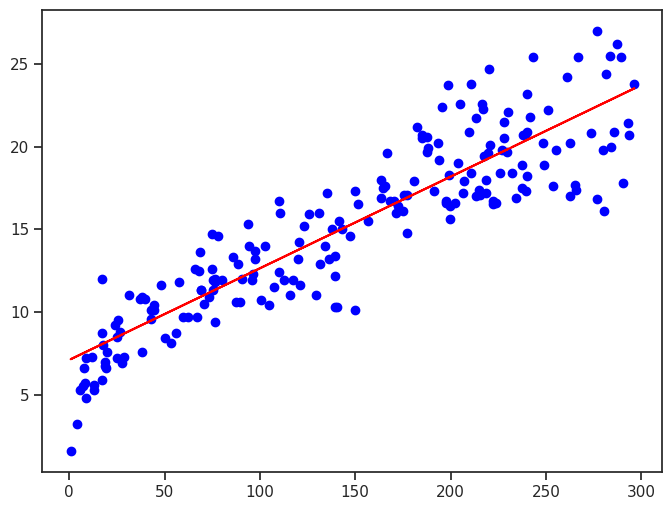

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_plot, color='red', label='Linear Regression Line')

In [27]:
from sklearn import metrics
print("Explaind variance:", metrics.explained_variance_score(y_test,y_predict))
print("Max error:",metrics.max_error(y_test,y_predict))
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_predict))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_predict,squared=True))
print("R-2 score:",metrics.r2_score(y_test,y_predict))

Explaind variance: 0.8046404510391957
Max error: 6.545852891170547
Mean absolute error: 1.8651146911099161
Mean squared error: 5.513351187165511
R-2 score: 0.7971876919875108


#Implementation in R

In [2]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages('tidyverse')
install.packages('caret')
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘lava’, ‘prodlim’, ‘ipred’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [7]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(caret)
library(corrplot)

corrplot 0.92 loaded



In [4]:
Data <- read.csv("/content/company.csv")

In [13]:
x.cor=cor(Data)
x.cor

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.9012079
Radio,0.05480866,1.00000000,0.35410375,0.3496311
Newspaper,0.05664787,0.35410375,1.00000000,0.1579600
Sales,0.90120791,0.34963110,0.15796003,1.0000000


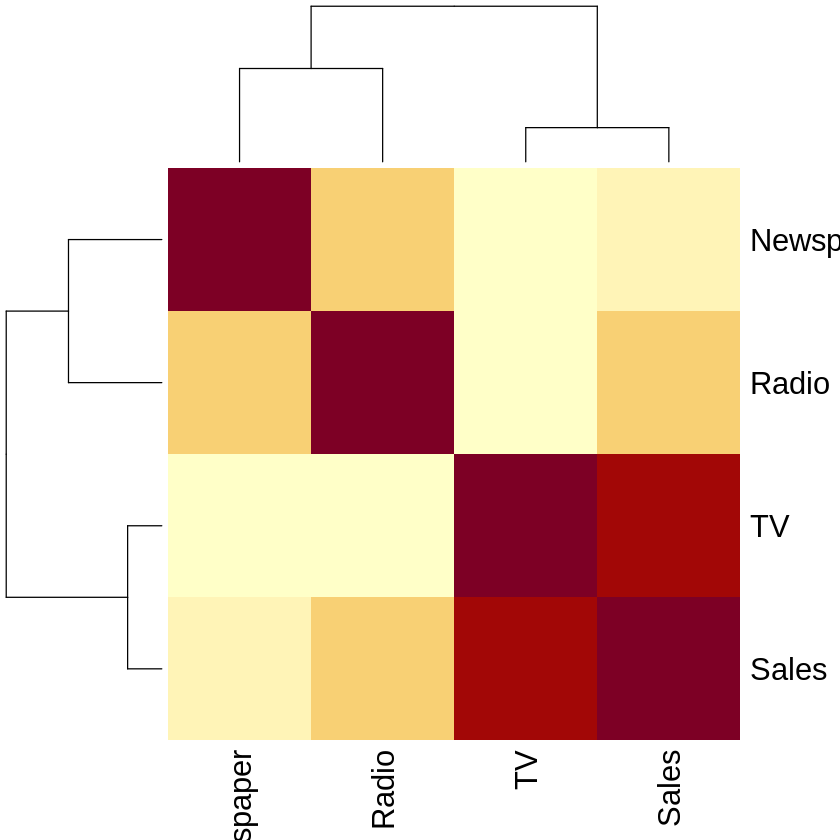

In [17]:
heatmap(x = x.cor, symm = TRUE)

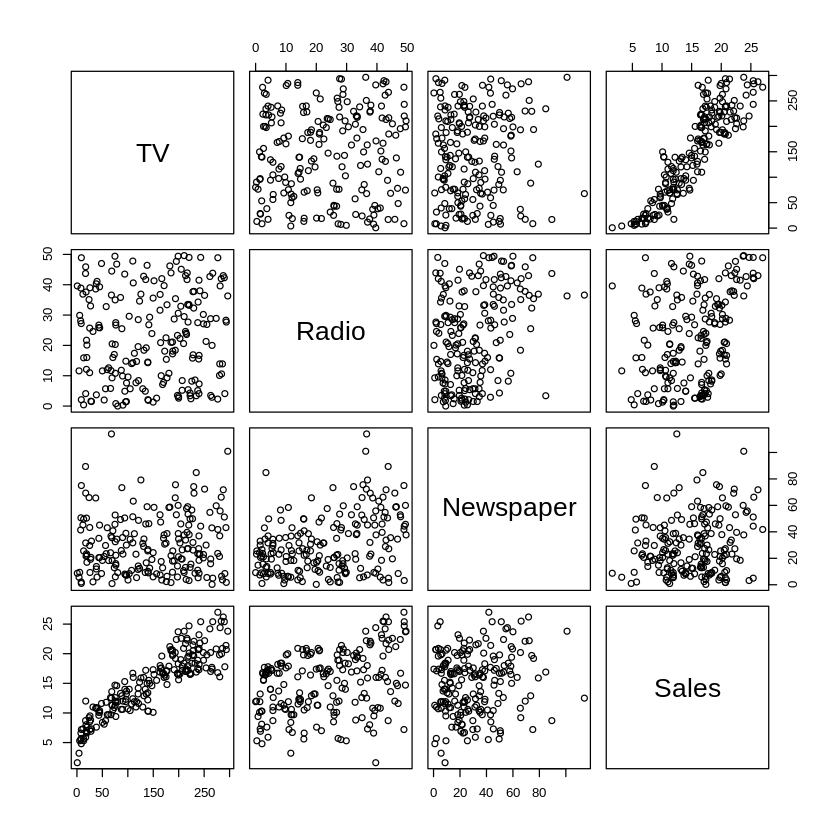

In [20]:
pairs(Data)

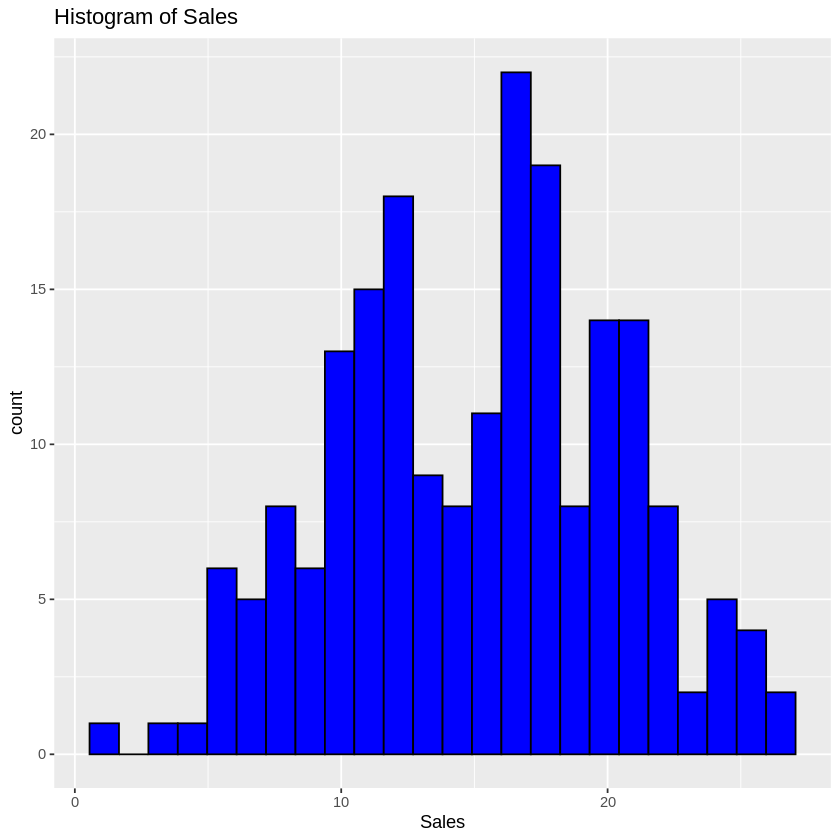

In [23]:
hist_plot <- ggplot(Data, aes(x = Sales)) +
  geom_histogram(color = "black", fill = "blue", bins = 24) +
  labs(title = "Histogram of Sales")
print(hist_plot)

In [36]:
set.seed(42)
train_index <- createDataPartition(Data$Sales, p = 0.75, list = FALSE)
x_train <- Data[train_index, "TV"]
y_train <- Data[train_index, "Sales"]
x_test <- Data[-train_index, "TV"]
y_test <- Data[-train_index, "Sales"]

In [31]:
model <- lm(Sales ~ TV, data =Data)
summary(model)


Call:
lm(formula = Sales ~ TV, data = Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4438 -1.4857  0.0218  1.5042  5.6932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.974821   0.322553   21.62   <2e-16 ***
TV          0.055465   0.001896   29.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.296 on 198 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8112 
F-statistic: 856.2 on 1 and 198 DF,  p-value: < 2.2e-16


In [32]:
x_test <- data.frame(TV = x_test)

In [33]:
y_predict <- predict(model, newdata = x_test)

In [38]:
print(summary(model))
print(postResample(y_predict, y_test))


Call:
lm(formula = Sales ~ TV, data = Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4438 -1.4857  0.0218  1.5042  5.6932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.974821   0.322553   21.62   <2e-16 ***
TV          0.055465   0.001896   29.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.296 on 198 degrees of freedom
Multiple R-squared:  0.8122,	Adjusted R-squared:  0.8112 
F-statistic: 856.2 on 1 and 198 DF,  p-value: < 2.2e-16

     RMSE  Rsquared       MAE 
2.2331601 0.8427651 1.7454037 


`geom_smooth()` using formula = 'y ~ x'


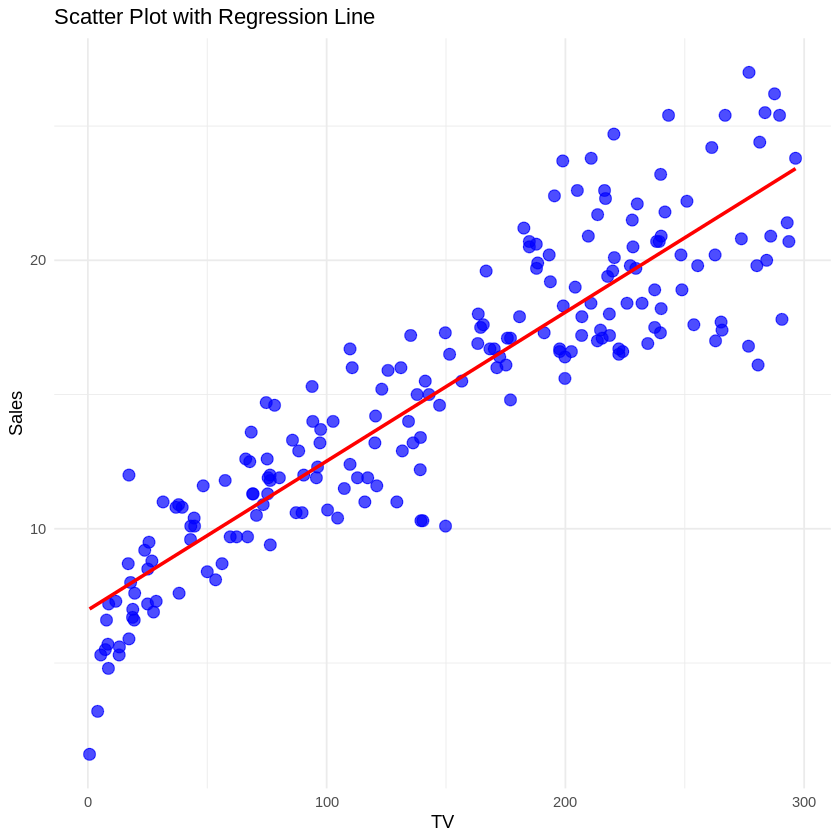

In [42]:
plot_data <- data.frame(TV = Data$TV, Sales = Data$Sales)

ggplot(plot_data, aes(x =TV, y = Sales)) +
  geom_point(color = 'blue', alpha = 0.7, size = 3) +
  geom_smooth(method = 'lm', se = FALSE, color = 'red') +
  labs(x = 'TV', y = 'Sales',
       title = 'Scatter Plot with Regression Line') +
  theme_minimal()